# Assignment sheet 3: Numerical Computation and Prinicipal Component Analysis (Deadline: Nov 24, 23:59)

In [20]:
# Set notebook to full width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

### Computational Issues with Softmax $~$ (3 points)

In the lecture you were introduced to the softmax function which is used to generate probabilities corresponding to the output labels. Typically, the input to the softmax function is a vector of numerical values over the labels and the output is a vector(of same dimension as the input vector) of corresponding probabilities.
**Softmax function is given by,** $~$
$$Softmax(x)_i = \frac{exp(x_i)}{\sum_{j=1}^n exp(x_j)}$$

**Numerical issues might occur when computing softmax functions on a computer which can perform computations
only upto a certain precision.** [Suggested reading $-$ [chapter 4.1 of DeepLearningBook](http://www.deeplearningbook.org/contents/numerical.html)]

$1$. Name these numerical issues and explain them. ($1$ points)

### Answer:

The sum in the denominator is susceptible to underflow (approximation to 0) for $x_i << 0$. This will lead to the denominator being approximated to $0$, which would result in an undefined expression.

The sum in the denominator is susceptible to underflow (approximation to 0) for $x_i >> 1$. This will lead to the denominator being approximated to $\infty$, which would eventually result in a numerical error.

$2$. Suggest a remedy (with explanation on why it works) to overcome these numerical issues occuring with Softmax computation. Prove that this remedy actually does not change the softmax criteria. Describe a situation where the proposed remedy still fails to remove instability. ($1$ point)

### Answer:

Given a vector $\vec{x} \in \mathbb{R}^n$, let $m$ be the magnitude of its largest component.

Then evaluating $softmax(\vec{x} - m)$ rules out the possibility of overflow and underflow. Observing the summation in the denominator we note that the largest argument to $exp(x)$ is now reduced to zero. This obviously prevents overflow. To see that it prevents underflow we note that $exp(0) = 1$ is a term in the summation, and hence it cannot be approximated to $0$, thus preventing underflow also.

We show that this doesn't change the $softmax$ value:

\begin{align}
softmax(\vec{x} - m)_i &= \frac{exp(x_i - m)}{\sum_{j=1}^n exp(x_j - m)} \\
&= \frac{exp(x_i)exp(- m)}{\sum_{j=1}^n exp(x_j)exp(- m)}\\
&= \frac{exp(x_i)exp(- m)}{exp(- m)\sum_{j=1}^n exp(x_j)}\\
&= \frac{exp(x_i)}{\sum_{j=1}^n exp(x_j)}\\
&= softmax(\vec{x})_i
\end{align}

Although this fixes the issues in the denominator, it doesn't address underflow issues in the numerator.

$3$. First write a naive Softmax implementation, in numpy, that can produce numerical instability. Then write a modified Softmax implementation which is numerically stable.  ($0.5 + 0.5 = 1$ points)

In [21]:
import numpy as np


x1=np.array([20, 30, 50])
x2=np.array([2E3, 2.1E3, 2.3E3])
x3=np.array([2E3, 3E3, 5E3])

def softmax_naive(x):
    """Unstable Softmax function. Expects a numpy array, returns an np.array.""" 
    sm_naive = np.exp(x)/np.sum(np.exp(x))
    return sm_naive

def softmax_modified(x):
    """Stable Softmax function. Expects a numpy array, returns an np.array."""
    z=np.max(x)
    sm_modified = np.exp(x-z)/np.sum(np.exp(x-z))
    return sm_modified

#The following example shows equality 
print(np.vstack((softmax_naive(x1), softmax_modified(x1))))

#The following example shows better handling of rounding errors, however note that the sum of components of softmax is greater than 1!
print(np.vstack((softmax_naive(x2), softmax_modified(x2))))

#The following example shows persistance of underflow errors resulting from the numerator
print(np.vstack((softmax_naive(x3), softmax_modified(x3))))



[[  9.35762295e-14   2.06115362e-09   9.99999998e-01]
 [  9.35762295e-14   2.06115362e-09   9.99999998e-01]]
[[              nan               nan               nan]
 [  5.14820022e-131   1.38389653e-087   1.00000000e+000]]
[[ nan  nan  nan]
 [  0.   0.   1.]]


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:10: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide


### Principal Component Analysis $~$ (7 points)

### Question $4$

Is PCA supervised or unsupervised, logically explain your answer. Which is the tunable parameter in PCA?
Briefly explain the role of this parameter in PCA.  ($1+0.5+0.5 = 2$ points)

### Answer

PCA tunes the size of reduced-dimension of the data such that the least-squares reconstruction error is minimised. The dimension with the largest variance (- ie the largest eigenvalue of the variance matrix) is the first principal component, the one with the second largest is the second principal component, etc. As this dimension is not provided in the training data PCA is classified as an unsupervised learning algorithm.

### Question $5$ 

Consider the following data:

setA: ${\bf x}^{(1)}$=$(2, 4)^T$, ${\bf x}^{(2)}$=$(2, 2)^T$, ${\bf x}^{(3)}$=$(3, 1)^T$, ${\bf x}^{(4)}$=$(5, 1)^T$ 

setB: ${\bf x}^{(1)}$=$(-1, 1)^T$, ${\bf x}^{(2)}$=$(-2, 2)^T$, ${\bf x}^{(3)}$=$(-1, 3)^T$, ${\bf x}^{(4)}$=$(-1, 4)^T$

$(a)$ Compress the above sets of vectors into a one-dimensional set using PCA, i.e., derive the encoder function $f(x)=D^{T}x$ as defined in the lecture. Then apply f to the datasets inorder to compress them. ($1.5 + 1.5$ points)

### Answer

We proceed as follows:

1. For each set, construct a matrix $M$ s.t. $M_{i,:} = x^{(i)T}$. In this case $M \in \mathbb{R}^{4 \times 2}$
2. Construct a matrix $X \ : \ X_{:,i} = M_{:,i} - \mathbb{E}(M_{:,i})$
2. Find eigenvalues and eigenvectors of square matrix $X^T X \in \mathbb{R}^{2 \times 2}$
3. Choose the eignvector corresponding to the largest eigenvalue (ie the first principal component) as the $D \in \mathbb{R}^2$ component of the encoder function $f(x)=D^{T}x$

Numerical calculation of this is included

In [46]:
a = np.array(np.mat('2 4; 2 2; 3 1; 5 1'))
b = np.array(np.mat('-1 1; -2 2; -1 3; -1 4'))

X_a = np.array(np.mat('2 4; 2 2; 3 1; 5 1'))
X_a[:,0] = a[:,0] - np.sum(a[:,0])/np.size(a[:,0])
X_a[:,1] = a[:,1] - np.sum(a[:,1])/np.size(a[:,1])

print("Centred X matrix for set A")
print(X_a)

X_b = np.array(np.mat('-1 1; -2 2; -1 3; -1 4'))
X_b = X_b - X_b.mean(axis=0)[:, np.newaxis].T
print("Centred X matrix for set B")
print(X_b)


Xa_sq = np.matmul(X_a.T ,X_a)
print("X^2 matrix for set A")
print(Xa_sq)

Xb_sq = np.matmul(X_b.T ,X_b)
print("X^2 matrix for set B")
print(Xb_sq)

evals_a, eigvecs_a = np.linalg.eigh(Xa_sq)
Da = eigvecs_a[:,np.argmax(evals_a)]

evals_b, eigvecs_b = np.linalg.eigh(Xb_sq)
Db = eigvecs_b[:,np.argmax(evals_b)]

pca_a = np.matmul(Da.T, X_a.T)
print("D for set A:", Da)
print("applying the encoder function ont set A:", pca_a)

print("D for set B:", Db)
pca_b = np.matmul(Db.T, X_b.T)
print("applying the encoder function ont set B:", pca_b)

decoded_a = np.matrix(Da).T * pca_a
print("Decoded A:") 
print(decoded_a)

decoded_b = np.matrix(Db).T * pca_b
print("Decoded B:") 
print(decoded_b)

Centred X matrix for set A
[[-1  2]
 [-1  0]
 [ 0 -1]
 [ 2 -1]]
Centred X matrix for set B
[[ 0.25 -1.5 ]
 [-0.75 -0.5 ]
 [ 0.25  0.5 ]
 [ 0.25  1.5 ]]
X^2 matrix for set A
[[ 6 -4]
 [-4  6]]
X^2 matrix for set B
[[ 0.75  0.5 ]
 [ 0.5   5.  ]]
D for set A: [-0.70710678  0.70710678]
applying the encoder function ont set A: [ 2.12132034  0.70710678 -0.70710678 -2.12132034]
D for set B: [ 0.1152884   0.99333206]
applying the encoder function ont set B: [-1.46117599 -0.58313233  0.52548813  1.51882019]
Decoded A:
[[-1.5 -0.5  0.5  1.5]
 [ 1.5  0.5 -0.5 -1.5]]
Decoded B:
[[-0.16845665 -0.0672284   0.06058269  0.17510235]
 [-1.45143296 -0.57924404  0.52198421  1.50869279]]


<img src="https://gitlab.com/subhc/nnia_w17/raw/master/a3q5_1.jpg" width="600"  />
<br />
<img src="https://gitlab.com/subhc/nnia_w17/raw/master/a3q5_2.jpg" width="600"  />

### Q5 
$(b)$ For both the above sets sketch the corresponding datasets in a separate figure. 
Also include the reconstructed vectors into the corresponding figures. ($2$ points)

### Answer

We do plots using _matplotlib_

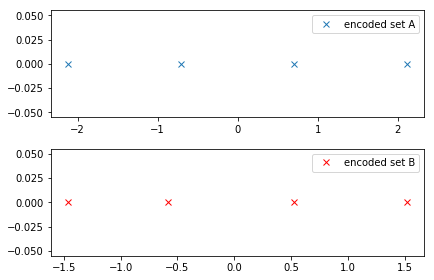

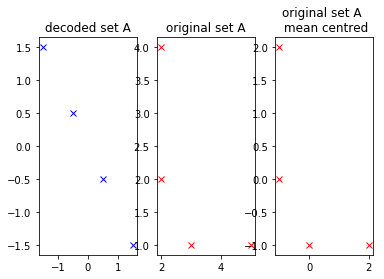

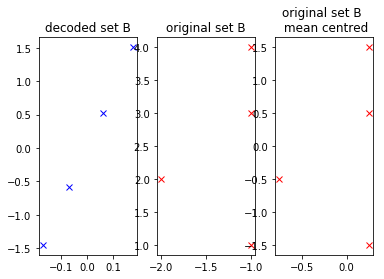

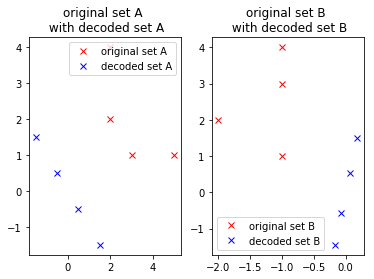

In [50]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(211)
plt.plot(pca_a, np.zeros_like(pca_a), 'x', label="encoded set A")
plt.legend()

plt.subplot(212)
plt.plot(pca_b, np.zeros_like(pca_b), 'x', color='red', label="encoded set B")
plt.legend()
plt.show()

#np.matmul(D.T, pca_a.T)

plt.subplot(131)
plt.plot(decoded_a[0,:], decoded_a[1,:],'x', color = 'blue')
plt.title("decoded set A")

plt.subplot(132)
plt.plot(a.T[0,:], a.T[1,:], 'x', color = 'red')
plt.title("original set A")

plt.subplot(133)
plt.plot(X_a.T[0,:], X_a.T[1,:], 'x', color = 'red')
plt.title("original set A \n mean centred")
plt.show()

plt.subplot(131)
plt.plot(decoded_b[0,:], decoded_b[1,:],'x', color = 'blue')
plt.title("decoded set B")

plt.subplot(132)
plt.plot(b.T[0,:], b.T[1,:], 'x', color = 'red')
plt.title("original set B")

plt.subplot(133)
plt.plot(X_b.T[0,:], X_b.T[1,:], 'x', color = 'red')
plt.title("original set B \n mean centred")
plt.show()

plt.subplot(121)
plt.plot(a.T[0,:], a.T[1,:], 'x', color = 'red', label="original set A")
plt.plot(decoded_a[0,:].T, decoded_a[1,:].T,'x', color = 'blue', label="decoded set A")
plt.title("original set A \n with decoded set A")
plt.legend()

plt.subplot(122)
plt.plot(b.T[0,:], b.T[1,:], 'x', color = 'red', label="original set B")
plt.plot(decoded_b[0,:].T, decoded_b[1,:].T,'x', color = 'blue', label="decoded set B")
plt.title("original set B \n with decoded set B")
plt.legend()
plt.show()


### Gradient descent and Newton's method $~$ (5 points)

**Suppose $f(x) = 2x^3 - 5x + 6$ **

### Question $6$ 

Write down the mathematical expressions for minimizing f(x) using Gradient descent(GD) and then using Newton's Method(NM). ($1$ points)

### Answer

Have,

\begin{align}
f^{'}(x) &= 6x^2 - 5\\
f^{''}(x) &= 12x
\end{align}

Then to minimise $f(x)$ via _Gradient Descent_ and _Newton's method_, we have:

\begin{align}
x_{n+1} &= x_n - \epsilon (6x_n^2 - 5) \ \ \ \ \ &\text{Gradient Descent w/ learning rate } \epsilon \\
x_{n+1} &= x_n - \frac{6x_n^2 - 5}{12x_n} \ \ \ \ \ &\text{Newton's Method}
\end{align}

### Question $7$ 

Report the updated values of x, both for GD and NM, at $x = 0$. what do you observe? ($1$ points)

### Answer

_Gradient Descent_ goes to point 5.

_Newton's Method_ experiences a division by zero.

### Question $8$ 

Perform GD and NM for the above function using Tensorflow. ($1.5 + 1.5$ points)

In [24]:
import tensorflow as tf

x = tf.Variable([[0.0],], tf.float32)

fx = 2*x**3 - 5*x + 6

df = tf.gradients(fx, x)

# As this is a manual implementation we had to pick the right epsilon, otherwise the solution overshoots
eps = tf.Variable([[0.1],], tf.float32)

with tf.Session() as sess:
    tf.initialize_all_variables().run()
    print (sess.run(x), sess.run(df))

    for i in range(15):
        print (sess.run(x.assign(x - eps*df[0])), sess.run(df))


# TODO : Implement Gradient Descent with Tensorflow

Instructions for updating:
Use `tf.global_variables_initializer` instead.
[[ 0.]] [array([[-5.]], dtype=float32)]
[[ 0.5]] [array([[-3.5]], dtype=float32)]
[[ 0.85000002]] [array([[-0.66499996]], dtype=float32)]
[[ 0.91650003]] [array([[ 0.03983402]], dtype=float32)]
[[ 0.91251665]] [array([[-0.00388002]], dtype=float32)]
[[ 0.91290468]] [array([[ 0.00036955]], dtype=float32)]
[[ 0.91286772]] [array([[ -3.52859497e-05]], dtype=float32)]
[[ 0.91287124]] [array([[  3.33786011e-06]], dtype=float32)]
[[ 0.91287088]] [array([[ -4.76837158e-07]], dtype=float32)]
[[ 0.91287094]] [array([[ 0.]], dtype=float32)]
[[ 0.91287094]] [array([[ 0.]], dtype=float32)]
[[ 0.91287094]] [array([[ 0.]], dtype=float32)]
[[ 0.91287094]] [array([[ 0.]], dtype=float32)]
[[ 0.91287094]] [array([[ 0.]], dtype=float32)]
[[ 0.91287094]] [array([[ 0.]], dtype=float32)]
[[ 0.91287094]] [array([[ 0.]], dtype=float32)]


In [25]:
import tensorflow as tf

x = tf.Variable([[0.05],], tf.float32)

fx = 2*x**3 - 5*x + 6

df = tf.gradients(fx, x)
ddf = tf.gradients(df, x)


with tf.Session() as sess:
    tf.initialize_all_variables().run()
    print (sess.run(x), sess.run(df), sess.run(ddf))

    for i in range(15):
        print (sess.run(x.assign(x - df[0]/ddf[0])), sess.run(df), sess.run(ddf))


# TODO : Implement Gradient Descent with Tensorflow

Instructions for updating:
Use `tf.global_variables_initializer` instead.
[[ 0.05]] [array([[-4.98500013]], dtype=float32)] [array([[ 0.60000002]], dtype=float32)]
[[ 8.35833359]] [array([[ 414.17044067]], dtype=float32)] [array([[ 100.30000305]], dtype=float32)]
[[ 4.22901726]] [array([[ 102.30751801]], dtype=float32)] [array([[ 50.74820709]], dtype=float32)]
[[ 2.21303439]] [array([[ 24.38512611]], dtype=float32)] [array([[ 26.55641174]], dtype=float32)]
[[ 1.29479563]] [array([[ 5.05897427]], dtype=float32)] [array([[ 15.53754807]], dtype=float32)]
[[ 0.96919894]] [array([[ 0.63607979]], dtype=float32)] [array([[ 11.63038731]], dtype=float32)]
[[ 0.91450775]] [array([[ 0.01794624]], dtype=float32)] [array([[ 10.97409248]], dtype=float32)]
[[ 0.91287243]] [array([[  1.62124634e-05]], dtype=float32)] [array([[ 10.95446968]], dtype=float32)]
[[ 0.91287094]] [array([[ 0.]], dtype=float32)] [array([[ 10.95445156]], dtype=float32)]
[[ 0.91287094]] [array([[ 0.]], dtype=float32)] [array([[

### Gradient descent computation and visualisation $~$ (3 + 2 points)

#### Now visualize the Gradient Descent algorithm to fit a straight line to data generated using  $y = \theta_{true}x$ $~$, i.e., use this expression to first produce the data (see code below the lines starting with m=20 and following) and then try to fit a straight line to this data. Fitting a straight line means that you have to approximate this $\theta_{true}$ parameter using the hypothesis or predictive model by minimizing the cost function defined below.

**For this task you should minimize a cost function of the form:**
$$\mathcal{CF} = \frac{1}{2m}\sum_{i=1}^m [h_{\theta}(x^i)-y^i]^2$$
where
- $x^i$ is the $i^{th}$ input 

- $y^i$ is the true $i^{th}$ response or output

- $h_{\theta}(x)$ is the hypothesis or predictive model

#### Assume $~$ $h_{\theta}(x) = \theta x$ $~$ to be the hypothesis or predictive model

### Answer

Before continuing we note that:

\begin{align}
\frac{\partial \mathcal{CF}}{\partial \theta} &= \frac{1}{m} \sum_{i=1}^{m}(\theta x_i^2 - x_i y_i) \\
&= \frac{1}{m} \sum_{i=1}^{m} x_i (h_{\theta}(x_i) - y_i)
\end{align}



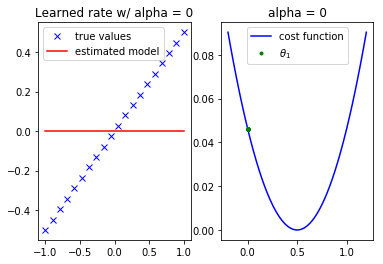

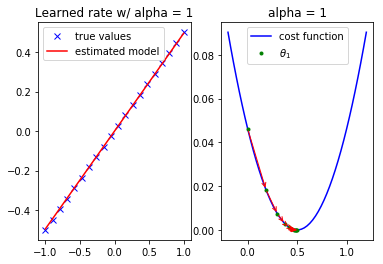

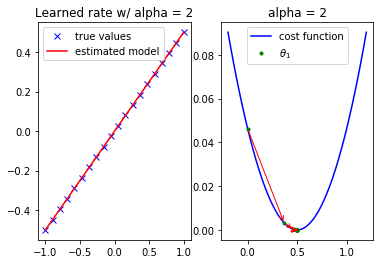

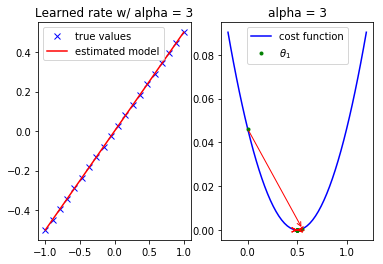

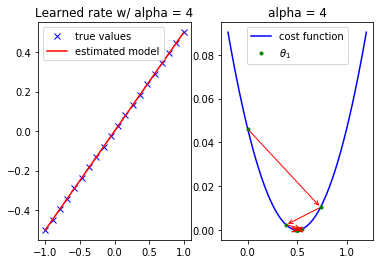

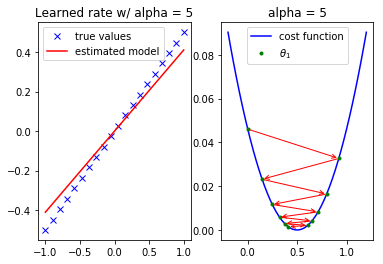

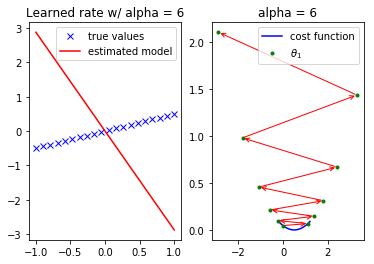

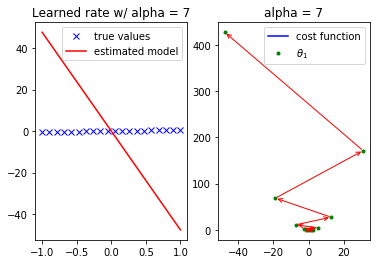

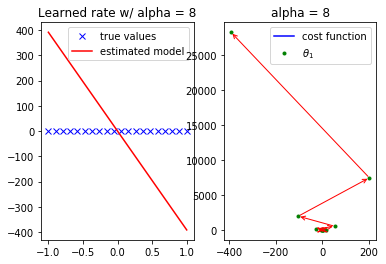

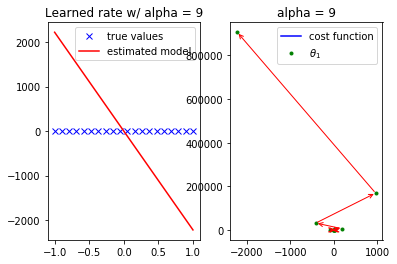

In [26]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate the true data which is to be fitted
m = 20                      # number of data points for x
theta_true = 0.5            # corresponds to the true slope
x = np.linspace(-1,1,m)     # x values or inputs
y = theta_true * x          # True response


# Create a subplot window
# On the left window plot the true data and the approximation 
# that you obtain with different estimates of the slope theta_true
# and on the right window plot the cost function 

# TODO : Create the subplot window



def hypothesis(x, theta):
    """Our "hypothesis or predictive model", a straight line through the origin."""
    
    # TODO : Implement
    
    hyp = x*theta
    return hyp

def cost_func(theta):
    """The cost function describing the goodness of fit."""  
    
    # TODO : Implement
    cost = 1/(2*m) * (hypothesis(x, theta) - y).T.dot(hypothesis(x, theta) - y)
    return cost


# First construct a grid of theta parameter and their corresponding
# cost function values.
theta_grid = np.linspace(-0.2,1.2,50)
# Find the cost function values to be stored in J_grid
# TODO : Create J_grid

J_grid = np.array(list(map(cost_func, theta_grid)))

# Plot the cost function as a function of theta.
# TODO : Do the plot



# Take N steps with learning rate alpha down the steepest gradient,
# starting at theta = 0.
N = 10
alpha = 10
# this is just a starting value of alpha, 
# you must consider different values of alpha (try using large values)
# and redo the steps below to generate different plots


def d_cost_func(theta):
    """The cost function describing the goodness of fit."""  
    
    # TODO : Implement
    d_cost = (1/(m)) * (np.sum(x*(hypothesis(x, theta) - y)))
    return d_cost

# TODO :Compute the N steps down the steepest gradient
# TODO : Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the left window of the subplot in a matching colour.
# TODO : Put the labels, titles and a legend.

# We print different vlaues of alpha 
for k in range(alpha):
    print() 
    theta = [0.0]
    for i in range(N):
        theta = np.append(theta, theta[i] - k * d_cost_func(theta[i]))
        
    #print(k, theta)
    
    errors = np.array(list(map(cost_func, theta)))
    plt.subplot(121)
    plt.plot(x,y, 'x', color = 'blue', label='true values')
    plt.plot(x, theta[-1]*x, '-', color='red', label='estimated model') #We choose the last estmated theta
    plt.title('Learned rate w/ alpha = %d' % k)
    plt.legend()
    
    plt.subplot(122)
    plt.plot(theta_grid, J_grid, color = 'blue', label='cost function')
    plt.plot(theta, errors, '.', color='green', label=r'$\theta_1$')
    plt.title('alpha = %d' % k)
    for j in range(N):
        plt.annotate('', xy=(theta[j+1], errors[j+1]), xytext=(theta[j], errors[j]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    plt.legend()
    
    plt.show()
    
    
    



#### Now assume that the data is generated using  $y = \theta_1x + \theta_0$
** Following the same logic you applied for the above task define a predictive model 
and perform 5 steps of gradient descent with learning rate alpha = 0.7 **

### Answer

In this case we have:

\begin{align}
\frac{\partial \mathcal{CF}}{\partial \theta_1} &= \frac{1}{m} \sum_{i=1}^{m}(\theta_1 x_i^2 + \theta_2 x_i - x_i y_i) \\
&= \frac{1}{m} \sum_{i=1}^{m} x_i (h_{\theta}(x_i) - y_i) \\
\frac{\partial \mathcal{CF}}{\partial \theta_2} &= \frac{1}{m} \sum_{i=1}^{m}(\theta_1 x_i + \theta_2 - y_i) \\
&= \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x_i) - y_i) \\
\end{align}

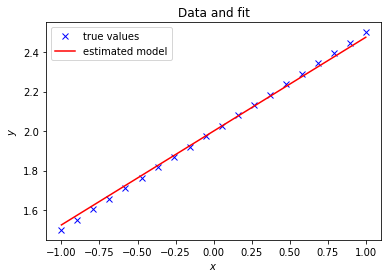

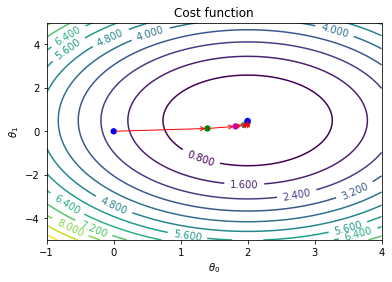

In [27]:
# Generate the true data which is to be fitted
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# Create the sub-plot: left window is the data, right window will be the cost function.
# TODO


def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    
    # TODO : Implement
    hyp = x*theta1 + theta0
    return hyp

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    
    # TODO : Implement
    # TODO : Implement
    cost = 1/(2*m) * (hypothesis(x, theta0, theta1) - y).T.dot(hypothesis(x, theta0, theta1) - y)
    return cost


# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
Thgrid0, Thgrid1 = np.meshgrid(theta0_grid, theta1_grid)
# TODO : Compute the cost function values
J_grid = np.array(list(map(cost_func, np.ravel(Thgrid0), np.ravel(Thgrid1))))
J_grid.shape = Thgrid0.shape



# TODO : Do a labeled contour plot for the cost function on right window of the above subplot

# TODO : Take 5 steps with learning rate alpha = 0.7 down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).

def d_cost_func(theta0, theta1):
    """The cost function describing the goodness of fit."""  
    
    # TODO : Implement
    d_cost1 = (1/(m)) * (np.sum(x*(hypothesis(x, theta0, theta1) - y)))
    d_cost0 = (1/(m)) * (np.sum((hypothesis(x, theta0, theta1) - y)))
    d_cost = np.array([d_cost0, d_cost1])
    
    return d_cost

N = 10
alpha = 0.7
theta = [[0.0, 0.0],]

for i in range(N):
    theta = np.append(theta, [theta[i] - alpha * d_cost_func(theta[i][0], theta[i][1])], axis=0)


plt.plot(np.linspace(-1,1,m) , theta0_true + theta1_true * np.linspace(-1,1,m), 'x', color = 'blue', label='true values')
plt.plot(x, theta[-1][1]*x + theta[-1][0], '-', color='red', label='estimated model') #We choose the last estmated theta
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Data and fit')
plt.show()

CS = plt.contour(Thgrid0, Thgrid1, J_grid, 15)
colors = ['b', 'g', 'm', 'c', 'orange']
for j in range(1,N):
    plt.annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
plt.clabel(CS, inline=1, fontsize=10)
plt.scatter(*zip(*theta), c=colors, s=40, lw=0)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Cost function')

plt.show()





### Linear Algebra Bonus
- [Additional material - Linear Algebra Basics](http://www.cs.ubc.ca/~schmidtm/Documents/2009_Notes_LinearAlgebra.pdf)

#### Trace of a Matrix $~$ (3 points)
- [Reading material on Trace](https://en.wikipedia.org/wiki/Trace_(linear_algebra)

Prove that the trace of a ***symmetric positive definite*** matrix is the sum of its eigenvalues.    ($0.5$ points)

### Answer

Since the Matrix $M$ is positive defnite, its eigenvalues are all positive and its eigendecomposition is as follows:

$M = P \ \Lambda\ P^{-1}$

$Trc(M) = Trc(P \ \Lambda\ P^{-1})$

$ = Trc(P^{-1}P\Lambda)$
    
$ = Trc(I \Lambda)$
    
$ = Trc(\Lambda)$
    
Which is the sum of all eigenvalues

Suppose $\mathbf{Y}$ is a $n \times m$ matrix with $m \leq n$ and has ***full rank***, then

$(a)$.   Give the rank of $\mathbf{Y}$.                                                                 ($0.5$ points)

### Answer 

Since $Y$ is full rank, $rank(Y)$ is the smallest of both dimensions which is equal to $m$.


$(b)$.  Show that trace of $\mathbf{Y}^{T}(\mathbf{Y}^T\mathbf{Y})^{-1}\mathbf{Y}$ = rank($\mathbf{Y}$)                                     ($1$ points)

### Answer 

\begin{align}
Tr(Y(Y^{T}Y)^{-1} Y^{T}) &= Tr(Y^{T} Y(Y^{T}Y)^{-1}) \ \ \ \ \ &\text{note: } Y^{T}  Y \in \mathbb{R}^{m \times m} \\  
&= Tr((Y^{T} Y)(Y^{T}Y)^{-1}) \\
&= Tr(I \times I) \\
&= rank(Y) \ \ \ \ \ &\text{since: } I \in \mathbb{R}^{m \times m}
\end{align}

$(c)$. Prove that $\mathbf{Y}^{T}(\mathbf{Y}^T\mathbf{Y})^{-1}\mathbf{Y}$ is the projection matrix w.r.t space defined by $\mathbf{Y}$.     ($1$ points)

### Answer

\begin{align}
(Y(Y^{T}Y)^{-1} Y^{T})^2 &= (Y(Y^{T}Y)^{-1} Y^{T}) (Y(Y^{T}Y)^{-1} Y^{T}) \\
&= Y(Y^{T}Y)^{-1} (Y^{T} Y) (Y^{T}Y)^{-1} Y^{T} \\
&= Y(Y^{T}Y)^{-1} Y^{T}
\end{align}

Since $(Y(Y^{T}Y)^{-1} Y^{T})^2 = (Y(Y^{T}Y)^{-1} Y^{T})$, we say that $(Y(Y^{T}Y)^{-1} Y^{T})$ is a projection matrix. It maps $x \in \mathbb{R}^n$ to $\mathbb{R}^m$, which is the space defined by $Y$.

#### Jacobian $~$ (3 points)

***[Reading material on Jacobian](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant)***

Show that the Jacobian determinant of $\frac{\partial(fg, h)}{\partial(u, v)}$ is equal to $\frac{\partial(f, h)}{\partial(u, v)}g + f\frac{\partial(g, h)}{\partial(u, v)}$,

where $f$,$g$, and $h$ are functions of $u$ and $v$ (i.e., $f(u,v)$, $g(u,v)$, and $h(u,v)$)   ($3$ points)

Hint: Use the property $\frac{\partial(y, x)}{\partial(u, v)} = \frac{\partial(y)}{\partial(u)}\frac{\partial(x)}{\partial(v)}-\frac{\partial(y)}{\partial(v)}\frac{\partial(x)}{\partial(u)}$

### Answer
We have the following Jacobian matrix:

\begin{align}
\frac{\partial(fg, h)}{\partial(u, v)} &= \left[\begin{array}{cccc}
   \frac{\partial(fg, h)}{\partial u} & \frac{\partial(fg, h)}{\partial v} \\
  \end{array}\right] \\
&= \left[\begin{array}{cccc}
   \frac{\partial fg}{\partial u} & \frac{\partial fg}{\partial v} \\
   \frac{\partial h}{\partial u} & \frac{\partial h}{\partial v} \\
  \end{array}\right] \\ 
&= \left[\begin{array}{cccc}
   \left(g \frac{\partial(f)}{\partial(u)} + f \frac{\partial(g)}{\partial(u)}\right) & \left(g \frac{\partial(f)}{\partial(v)} + f \frac{\partial(g)}{\partial(v)}\right) \\
   \frac{\partial h}{\partial u} & \frac{\partial h}{\partial v} \\
  \end{array}\right] \\
\end{align}

Taking the determinant we have:

\begin{align}
\det{\frac{\partial(fg, h)}{\partial(u, v)}} &= \left| \begin{array}{cccc}
   \frac{\partial fg}{\partial u} & \frac{\partial fg}{\partial v} \\
   \frac{\partial h}{\partial u} & \frac{\partial h}{\partial v} \\
  \end{array} \right| \\ 
&= \left(g \frac{\partial(f)}{\partial(u)} + f \frac{\partial(g)}{\partial(u)}\right) \frac{\partial(h)}{\partial(v)} - \left(g \frac{\partial(f)}{\partial(v)} + f \frac{\partial(g)}{\partial(v)}\right) \frac{\partial(h)}{\partial(u)} \\
&= g \frac{\partial(f)}{\partial(u)} \frac{\partial(h)}{\partial(v)} + f \frac{\partial(g)}{\partial(u)} \frac{\partial(h)}{\partial(v)} - g \frac{\partial(f)}{\partial(v)} \frac{\partial(h)}{\partial(u)} - f \frac{\partial(g)}{\partial(v)} \frac{\partial(h)}{\partial(u)} \\
&= g \left(\frac{\partial(f)}{\partial(u)} \frac{\partial(h)}{\partial(v)} - \frac{\partial(f)}{\partial(v)} \frac{\partial(h)}{\partial(u)}\right) + f \left(\frac{\partial(g)}{\partial(u)} \frac{\partial(h)}{\partial(v)} - \frac{\partial(g)}{\partial(v)} \frac{\partial(h)}{\partial(u)}\right) \\
&= g \frac{\partial(f, h)}{\partial(u, v)} + f \frac{\partial(g, h)}{\partial(u, v)} \\
\end{align}

#### Hessian $~$ (2 points)
***[Reading material on Hessian](https://en.wikipedia.org/wiki/Hessian_matrix)***

Let $\mathbf{M}=\left[\begin{array}{cccc}
   5 & 1 & 0 & 1\\
   1 & 4 & 1 & 0\\
   0 & 1 & 3 & 1\\
   1 & 0 & 1 & 2\\
  \end{array}\right]$
  
denote the Hessian matrix at particular point for a particular function.

$(a)$. What properties of the functional can you infer from the above information.(give mathematical reasons) ($1$ point)

### Answer

At this point, the Hessian is positive definite (i.e. all eigenvalues are positive). Therefore, the function has a local minimum at this point.

$(b)$. Provide a generic mathematical representation (e.g. the generic representation of a straight line is $ax+by+c=0$) for the above function. ($1$ point)

### Answer

It's not clear what general form $M$ takes, since we are only given $M$ at a point. Hence $f(x_1, x_2, x_3, x_4)$ can take many forms. In the simplest case it is a quadratic equation of 4 variables:

\begin{align}
f(x_1, x_2, x_3, x_4) &= \frac{5}{2}x_1^2 + \frac{4}{2}x_2^2 + \frac{3}{2}x_3^2 + \frac{2}{2}x_4^2 + x_1 x_2 + x_1 x_4 + x_2 x_3 + x_3 x_4 + a x_1 + b x_2 + c x_3 + d x_4 + e \ \ \ \ \ \ \ & a,b,c,d,e \in \mathbb{R}\\
\end{align}